In [5]:

%load_ext autoreload
%autoreload 2
import common.utils as utils
import pandas as pd
import seaborn as sns
import os
import common.lazy as lazy
import common.charts.validation as charts
import matplotlib.pyplot as plt

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
functionName = "comparison-io-mock-validation"
definition = utils.getBenchmarkDefinition(functionName)
benchmarkName = "comparison-io-mock-validation"

Analyzing comarison-io-mock-validation
Loading request metrics for comarison-io-mock-validation
                                 time      value tags.currentRps  \
0 2025-02-25 13:38:42.697564445+00:00  23.349673               1   
1 2025-02-25 13:38:43.833316647+00:00  47.620990               1   
2 2025-02-25 13:38:44.668384302+00:00  30.508534               1   
3 2025-02-25 13:38:45.383370484+00:00  26.545136               1   
4 2025-02-25 13:38:46.022337593+00:00  31.520585               1   

  tags.expected_response tags.group tags.method  \
0                   true                   POST   
1                   true                   POST   
2                   true                   POST   
3                   true                   POST   
4                   true                   POST   

                            tags.name tags.proto tags.scenario tags.status  \
0  http://localhost:8089?name=go-io-0   HTTP/1.1  validation-1         200   
1  http://localhost:8089?name=go

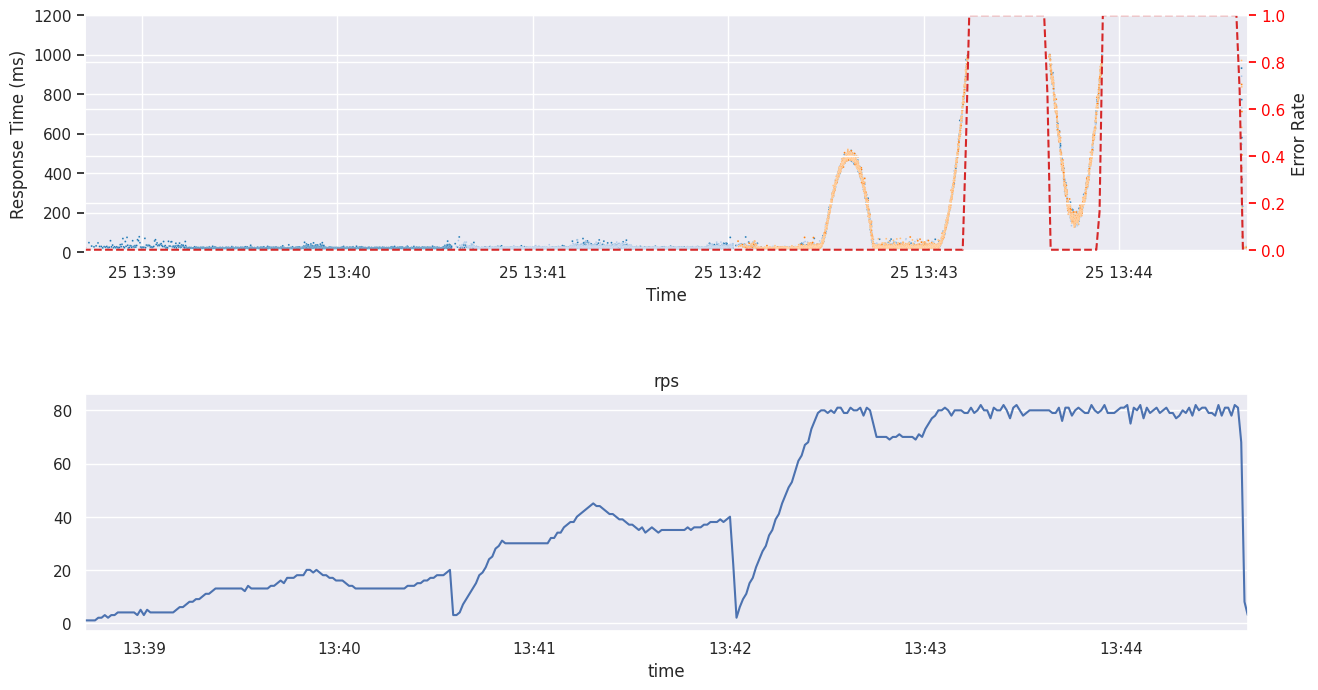

In [7]:
for run in range(1, 2):
    # definition["name"] = f"{benchmarkName}-{run}"
    print(f"Analyzing {definition['name']}")
    outputFolder = f"output/{definition['name']}"
    if not os.path.exists(outputFolder):
        os.makedirs(outputFolder)
    print(f"Loading request metrics for {definition['name']}")
    runs = [lazy.getResultSummary(definition["name"],r["name"]) for r in definition["benchmarks"]]
    data = [lazy.getHttRequestStats(definition["name"], run["replicas"]) for run in runs]
    httpStatsCombined = pd.concat(data)
    print(httpStatsCombined.head())
    print(f"Loaded request metrics")

    for run in runs:
        print(f"Creating charts for {run['replicas']}")
        httpStats = httpStatsCombined.query(f"testName == '{run['replicas']}'")
        httpReqSending = lazy.getHttpReqSending(definition["name"], run["replicas"])
        fig, axes =charts.simpleBenchmarkChart(httpStats, httpReqSending)
        plt.savefig(f"{outputFolder}/response-time-chart_{definition['docker_image_name']}-{run['replicas']}.png", bbox_inches='tight')

